In [1]:
import json
import os
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st
#import an excel reader
import openpyxl


In [2]:
a = [20,40]
print(np.array(a)/20)

[1. 2.]


In [2]:
results = {}
resultsTAExcess = {}
production = {}
production_tap = {}
resultsSpread = {}
Issuance = {}
ub={}
profits = {}
avg_profits = {}
std_profits = {}
avg_profits_tap = {}	
std_profits_tap = {}
purchasing_weights = {}
purchasing_weights_tap = {}
price_purchasing = {}
avg_inv_p = {}
plot_font = "Times New Roman"

# Load the results
numAges = 5
nProducts = 2
targetAges = [2,4]
ages = [i for i in range(numAges)]
prod_threshold = [4 for _ in range(nProducts)]


sf_levels = [3,5]
sr_levels = [2,3,4,5]
ps_levels = [15,20,25,30]

# Function to handle non-numeric entries
def safe_int(x):
    try:
        return int(x)
    except (ValueError, TypeError):
        return None  # or np.nan, depending on how you want to handle it

for sf in sf_levels:
    for sr in sr_levels:
        for ps in ps_levels:
            currentInstance = f"2nP_{sf}sF_PUpU_{sr}sprRev_0.25oDP_{ps}pS"
            results[(sf,sr,ps)] = json.load(open(f"{os.getcwd()}\Analysis\PurchasingAmount\{currentInstance}_ScaleSimulation.json"))
            print("Loaded ", currentInstance)
            currentInstance = f"2nP_{sf}sF_PUpU_{sr}sprRev_0.25oDP_{ps}pS"
            Issuance[(sf,sr,ps)] = results[(sf,sr,ps)]["avgSelling"]
            production[(sf,sr,ps)] = np.array([results[(sf,sr,ps)]["serviceLevels"][i] for i in ["1","2"]])/20_000
            avg_inv_p[(sf,sr,ps)] = results[(sf,sr,ps)]["avgPurchasingInventory"]
            avg_profits[(sf,sr,ps)] = results[(sf,sr,ps)]["avgProfits"]
            std_profits[(sf,sr,ps)] = results[(sf,sr,ps)]["stdProfits"]
            ub[(sf,sr,ps)] = json.load(open(f"{os.getcwd()}\ScaledCase\{currentInstance}_Opt.json"))
            wb = openpyxl.load_workbook(f"{os.getcwd()}\Analysis\PurchasingAmount\{currentInstance}_largeInstance_TAp.xlsx")
            ws = wb.active
            avg_profits_tap[(sf,sr,ps)] = ws['B1'].value
            std_profits_tap[(sf,sr,ps)] = ws['B2'].value
            purchasing_weights_tap[(sf, sr, ps)] = np.array([cell.value for row in ws['B41:N41'] for cell in row])
            purchasing_weights_tap[(sf, sr, ps)] = purchasing_weights_tap[(sf, sr, ps)]/np.sum(purchasing_weights_tap[(sf, sr, ps)])
            production_weights_tap = {0: np.array([cell.value for row in ws['B47:F47'] for cell in row]), 1: np.array([cell.value for row in ws['B49:F49'] for cell in row])} 
            production_weights_tap[0] = production_weights_tap[0]/np.sum(production_weights_tap[0])
            production_weights_tap[1] = production_weights_tap[1]/np.sum(production_weights_tap[1])
            production_tap[(sf,sr,ps)] = {i: production_weights_tap[i]@np.array([i for i in range(5)])/4 for i in range(2)}
            wb.close()
            wb = openpyxl.load_workbook(f"{os.getcwd()}\Analysis\PurchasingAmount\{currentInstance}_largeInstance.xlsx")
            ws = wb.active
            purchasing_weights[(sf, sr, ps)] = np.array([cell.value for row in ws['B41:N41'] for cell in row])
            purchasing_weights[(sf, sr, ps)] = purchasing_weights[(sf, sr, ps)]/np.sum(purchasing_weights[(sf, sr, ps)])
            wb.close()
            

Loaded  2nP_3sF_PUpU_2sprRev_0.25oDP_15pS
Loaded  2nP_3sF_PUpU_2sprRev_0.25oDP_20pS
Loaded  2nP_3sF_PUpU_2sprRev_0.25oDP_25pS
Loaded  2nP_3sF_PUpU_2sprRev_0.25oDP_30pS
Loaded  2nP_3sF_PUpU_3sprRev_0.25oDP_15pS
Loaded  2nP_3sF_PUpU_3sprRev_0.25oDP_20pS
Loaded  2nP_3sF_PUpU_3sprRev_0.25oDP_25pS
Loaded  2nP_3sF_PUpU_3sprRev_0.25oDP_30pS
Loaded  2nP_3sF_PUpU_4sprRev_0.25oDP_15pS
Loaded  2nP_3sF_PUpU_4sprRev_0.25oDP_20pS
Loaded  2nP_3sF_PUpU_4sprRev_0.25oDP_25pS
Loaded  2nP_3sF_PUpU_4sprRev_0.25oDP_30pS
Loaded  2nP_3sF_PUpU_5sprRev_0.25oDP_15pS
Loaded  2nP_3sF_PUpU_5sprRev_0.25oDP_20pS
Loaded  2nP_3sF_PUpU_5sprRev_0.25oDP_25pS
Loaded  2nP_3sF_PUpU_5sprRev_0.25oDP_30pS
Loaded  2nP_5sF_PUpU_2sprRev_0.25oDP_15pS
Loaded  2nP_5sF_PUpU_2sprRev_0.25oDP_20pS
Loaded  2nP_5sF_PUpU_2sprRev_0.25oDP_25pS
Loaded  2nP_5sF_PUpU_2sprRev_0.25oDP_30pS
Loaded  2nP_5sF_PUpU_3sprRev_0.25oDP_15pS
Loaded  2nP_5sF_PUpU_3sprRev_0.25oDP_20pS
Loaded  2nP_5sF_PUpU_3sprRev_0.25oDP_25pS
Loaded  2nP_5sF_PUpU_3sprRev_0.25o

[8.72244365716827, 7.5088920025680945, 7.2054998068462845, 7.049734232985756, 6.700231330240178, 6.0839568412547065, 5.277918627951942, 4.4178186717555095, 3.6313013214489342, 2.9948487911572017, 2.513912137110884, 2.1261139930860145, 1.7274838778018362, 1.2217506320063998, 0.5927477182381655]
[9.055175495946305, 6.826210633145837, 6.649630002737886, 6.505880996964198, 6.38549721424798, 6.282834061968676, 4.715319665574357, 4.656422127230445, 4.604642299160145, 2.5787290356813815, 2.555681365249582, 2.5350899210838973, 2.5166212330752447, 2.5000000000000004, 0.0]
[2.0, 0.0, 0.0, 0.0, 0.0, 1.5, 0.0, 0.0, 2.0, 0.0, 0.0, 0.0, 0.0, 2.5000000000000004, 0.0]
[0.9616882827312629, 0.11205046726873702, 0.0, 0.22318553613421077, 0.516861042522629, 0.7304684713431602, 0.8042204337848906, 0.7456828737327106, 0.6063577414517693, 0.4582656672721219, 0.3705286352731667, 0.38595265696832604, 0.4976104449896743, 0.6254240867721604, 0.5927477182381655]


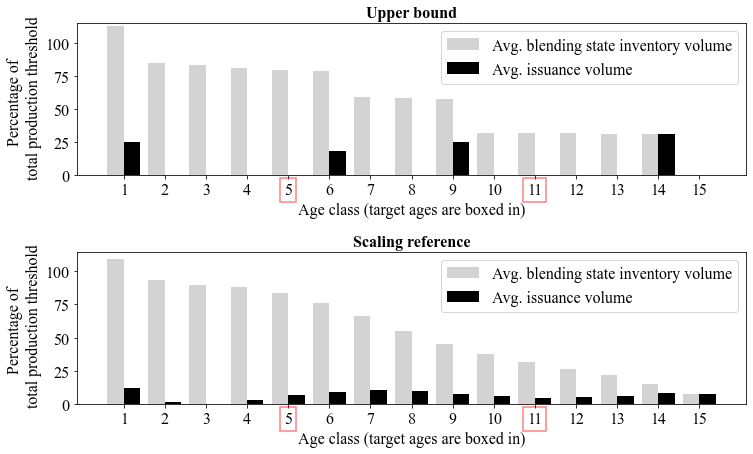

In [4]:
#contrast average blending state inventory structure and avg issuance in MDP solution and upper bound
problem_instance = (3,3,30)
targetAgesLarge = [5,11] if problem_instance[0] == 3 else [8,18]
agesLarge = np.array([i for i in range(15)]) if problem_instance[0] == 3 else np.array([i for i in range(25)])
ages = np.array(ages)
print(ub[problem_instance]["scaling_approx"]["blendingInv"])
print(ub[problem_instance]["ub_large"]["blendingInv"])

print(ub[problem_instance]["ub_large"]["Sales"])
print(ub[problem_instance]["scaling_approx"]["Sales"])


#show results in two bar plots, one for MDP solution and one for upper bound
# Create the bar plot
plt.rc('font', family="Times New Roman")
plt.rc('axes', labelsize=16)
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
plt.rc('legend', fontsize=16)
plt.rc('legend', title_fontsize=16)
#set title fontsize
plt.rc('axes', titlesize=16)
fig, ax = plt.subplots(2, 1, figsize=(12,7))


#add bar plot with default colors
ax[0].bar(agesLarge-0.2, np.array(ub[problem_instance]["ub_large"]["blendingInv"])/8, color="lightgrey", width=0.4)
ax[0].bar(agesLarge+0.2, np.array(ub[problem_instance]["ub_large"]["Sales"])/8, color="black", width=0.4)
ax[0].set_title("Upper bound", fontweight="bold")
ax[0].set_xticks(agesLarge,[str(i+1) for i in agesLarge])
ax[0].set_ylabel("Percentage of \n total production threshold")
ax[0].set_yticks([0,0.25,0.5,0.75,1.0], ["0","25","50","75","100"])
ax[0].set_ylim(0,1.15)
ax[0].set_xlabel("Age class (target ages are boxed in)")

#create a box around the target ages in axis tick labels
for i in targetAgesLarge:
    ax[0].get_xticklabels()[i-1].set_bbox(dict(facecolor='none', alpha=0.5, edgecolor='red', linewidth=1.5))


#increase the gap between the two plots
plt.subplots_adjust(hspace=0.5)

#add bar plot with default colors
ax[1].bar(agesLarge-0.2, np.array(ub[problem_instance]["scaling_approx"]["blendingInv"])/8, color="lightgrey", width=0.4)
ax[1].bar(agesLarge+0.2, np.array(ub[problem_instance]["scaling_approx"]["Sales"])/8, color="black", width=0.4)
ax[1].set_title("Scaling reference", fontweight="bold")
ax[1].set_xticks(agesLarge,[str(i+1) for i in agesLarge])
#ax[1].set_ylabel("Percentage of \n total production threshold")
ax[1].set_yticks([0,0.25,0.5,0.75,1.0], ["0","25","50","75","100"])
ax[1].set_ylabel("Percentage of \n total production threshold")
ax[1].set_ylim(0,1.15)
ax[1].set_xlabel("Age class (target ages are boxed in)")

for i in targetAgesLarge:
    ax[1].get_xticklabels()[i-1].set_bbox(dict(facecolor='none', alpha=0.5, edgecolor='red', linewidth=1.5))

#add legend
ax[0].legend(["Avg. blending state inventory volume", "Avg. issuance volume"], loc="upper right")
ax[1].legend(["Avg. blending state inventory volume", "Avg. issuance volume"], loc="upper right")

#save plot as pdf
plt.savefig(f"{os.getcwd()}\Figures\scaling_reference_structure.pdf", bbox_inches='tight')

In [5]:
#calculate average percentage gain over TAp
gain = {}
for sf in sf_levels:
    for sr in sr_levels:
        for ps in ps_levels:
            gain[(sf,sr,ps)] = (avg_profits[(sf,sr,ps)]-avg_profits_tap[(sf,sr,ps)])/avg_profits_tap[(sf,sr,ps)]

#calculate average 
avg_gain = np.average([gain[(sf,sr,ps)] for sf in sf_levels for sr in sr_levels for ps in ps_levels])
print("Average gain over TAp: ", avg_gain)

#derive 95% confidence interval
import scipy.stats as st

def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), st.sem(a)
    h = se * st.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

print("Confidence interval: ", mean_confidence_interval([gain[(sf,sr,ps)] for sf in sf_levels for sr in sr_levels for ps in ps_levels]))

#calculate coefficient of variation for profits and profits in TAp case
cv_profits = {}
cv_profits_tap = {}
for sf in sf_levels:
    for sr in sr_levels:
        for ps in ps_levels:
            cv_profits[(sf,sr,ps)] = std_profits[(sf,sr,ps)]/avg_profits[(sf,sr,ps)]
            cv_profits_tap[(sf,sr,ps)] = std_profits_tap[(sf,sr,ps)]/avg_profits_tap[(sf,sr,ps)]   

#calculate average coefficient of variation for profits and profits over TAp
avg_cv_profits = np.average([cv_profits[(sf,sr,ps)] for sf in sf_levels for sr in sr_levels for ps in ps_levels])
avg_cv_profits_tap = np.average([cv_profits_tap[(sf,sr,ps)] for sf in sf_levels for sr in sr_levels for ps in ps_levels])

print("Average coefficient of variation for profits: ", avg_cv_profits)
print("Average coefficient of variation for profits in TAp case: ", avg_cv_profits_tap)


Average gain over TAp:  0.21449212967946923
Confidence interval:  (0.21449212967946923, 0.15142866182750048, 0.277555597531438)
Average coefficient of variation for profits:  0.10225079610623747
Average coefficient of variation for profits in TAp case:  0.5089195722397288


Confidence interval for profit gap:  (0.028337571305349536, 0.026297468910987328, 0.030377673699711744)


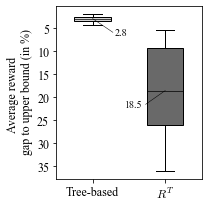

In [6]:
#create boxplot of profit gap to upper bound for both avgProfits and avgProfits_tap
profit_gap = {}
profit_gap_tap = {}

for sf in sf_levels:
    for sr in sr_levels:
        for ps in ps_levels:
            profit_gap[(sf,sr,ps)] = (ub[(sf,sr,ps)]["ub_large"]["ub"] - avg_profits[(sf,sr,ps)])/ub[(sf,sr,ps)]["ub_large"]["ub"]
            profit_gap_tap[(sf,sr,ps)] = (ub[(sf,sr,ps)]["ub_large"]["ub"] - avg_profits_tap[(sf,sr,ps)])/ub[(sf,sr,ps)]["ub_large"]["ub"]

#calculate confidence intervals for the profit gap
print("Confidence interval for profit gap: ", mean_confidence_interval([profit_gap[(sf,sr,ps)] for sf in sf_levels for sr in sr_levels for ps in ps_levels]))

plt.figure(figsize=(3,3))
plt.rc('font', family="Times New Roman")
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rc('axes', labelsize=12)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
plt.rc('legend', fontsize=12)

box = plt.boxplot([list(profit_gap.values()),list(profit_gap_tap.values())],labels=["avgProfits","avgProfits_tap"],widths=0.5, showfliers=False, patch_artist=True, medianprops=dict(color='none'), meanprops=dict(color='black', linewidth=0.5))        
# mean lines should be black
plt.setp(box['means'], color='black')
colors = ['lightgrey', 'dimgrey']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

means = [np.mean(list(profit_gap.values())), np.mean(list(profit_gap_tap.values()))]
for i, mean in enumerate(means, start=1):
    plt.plot([i - 0.25, i + 0.25], [mean, mean], color="black", linewidth=0.7)  # Adjust line width and color as desired



plt.ylabel("Average reward \n gap to upper bound (in %)")
plt.xticks([1,2],["Tree-based","${R}^{T}$"])

#set y tick labels to integer percentages
plt.yticks([0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35], [5, 10, 15, 20, 25, 30, 35])	
#reverse y axis
plt.gca().invert_yaxis()
#add text to show the mean value fpr each boxplot
plt.text(1.4,np.mean(list(profit_gap.values()))+0.03,f"{np.round(np.mean(list(profit_gap.values()))*100,1)}",horizontalalignment='center',verticalalignment='center')
plt.text(1.57,np.mean(list(profit_gap_tap.values()))+0.03,f"{np.round(np.mean(list(profit_gap_tap.values()))*100,1)}",horizontalalignment='center',verticalalignment='center')
#add line from text to mean value
plt.plot([1,1.28],[np.mean(list(profit_gap.values())),np.mean(list(profit_gap.values()))+0.03],color='black', linewidth=0.5)
plt.plot([2,1.73],[np.mean(list(profit_gap_tap.values())),np.mean(list(profit_gap_tap.values()))+0.03],color='black', linewidth=0.5)

plt.tight_layout()
plt.savefig(f"{os.getcwd()}\Figures\profit_gap_boxplot_large.pdf")


Main effects:  {'gain': {'sf': {3: 0.22241670435996808, 5: 0.2065675549989704}, 'ind_sf': {3: [0.03989060602116835, 0.039830042536876005, 0.04715571527719618, 0.04887883044775237, 0.08634060313075742, 0.09612986864365787, 0.10937691610242666, 0.1248572901278388, 0.19536016228541003, 0.2253056181210659, 0.24675214024690223, 0.28184282463730537, 0.47733527506319096, 0.5241248888459806, 0.5086197852289986, 0.506866703042962], 5: [0.028972885878593924, 0.03031676056999703, 0.03770988588875581, 0.04393143070064747, 0.08362843438610065, 0.0973670484861571, 0.10284873346286309, 0.11530465177681416, 0.1955538530348433, 0.2041154070571394, 0.23945705413011203, 0.2607976059193617, 0.44152345029757795, 0.47327768389606945, 0.4700090762272483, 0.4802669182712451]}, 'diff_sf': {5: -0.015849149360997683}, 'sr': {2: 0.039585769665123394, 3: 0.10198169326457697, 4: 0.2311480831790175, 5: 0.4852529726091591}, 'ind_sr': {2: [0.03989060602116835, 0.039830042536876005, 0.04715571527719618, 0.0488788304477

C:\Users\ga84cib\AppData\Local\Temp/ipykernel_22628/3424846978.py:179: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  plt.subplots_adjust(left=0.1, right=0.85, top=0.85, bottom=0.25, wspace=0.4)
C:\Users\ga84cib\AppData\Local\Temp/ipykernel_22628/3424846978.py:180: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout(pad=2.0)


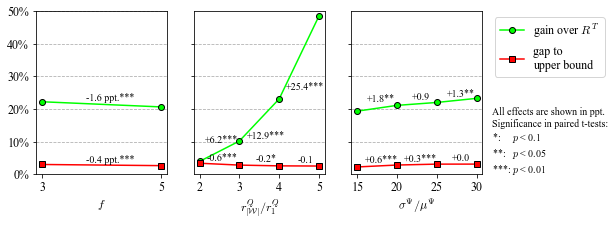

In [7]:
#calculate main effects of gain and profit gap for different levels of sf, sr and ps   
main_effects = {"gain":{"sf":{}, "ind_sf":{}, "diff_sf":{}, "sr":{}, "ind_sr":{}, "diff_sr":{}, "ps":{}, "ind_ps":{}, "diff_ps":{}},"profit_gap":{"sf":{}, "ind_sf":{}, "diff_sf":{}, "sr":{}, "ind_sr":{}, "diff_sr":{}, "ps":{}, "ind_ps":{}, "diff_ps":{}}}

for sf in sf_levels:
    main_effects["gain"]["sf"][sf] = np.average([gain[(sf,sr,ps)] for sr in sr_levels for ps in ps_levels])
    main_effects["gain"]["ind_sf"][sf] = [gain[(sf,sr,ps)] for sr in sr_levels for ps in ps_levels]
    main_effects["profit_gap"]["sf"][sf] = np.average([profit_gap[(sf,sr,ps)] for sr in sr_levels for ps in ps_levels])
    main_effects["profit_gap"]["ind_sf"][sf] = [profit_gap[(sf,sr,ps)] for sr in sr_levels for ps in ps_levels]
    if sf > 3:
        main_effects["gain"]["diff_sf"][sf] = main_effects["gain"]["sf"][sf] - main_effects["gain"]["sf"][3]
        main_effects["profit_gap"]["diff_sf"][sf] = main_effects["profit_gap"]["sf"][sf] - main_effects["profit_gap"]["sf"][3]


for sr in sr_levels:
    main_effects["gain"]["sr"][sr] = np.average([gain[(sf,sr,ps)] for sf in sf_levels for ps in ps_levels])
    main_effects["gain"]["ind_sr"][sr] = [gain[(sf,sr,ps)] for sf in sf_levels for ps in ps_levels]
    main_effects["profit_gap"]["sr"][sr] = np.average([profit_gap[(sf,sr,ps)] for sf in sf_levels for ps in ps_levels])
    main_effects["profit_gap"]["ind_sr"][sr] = [profit_gap[(sf,sr,ps)] for sf in sf_levels for ps in ps_levels]
    if sr > 2:
        main_effects["gain"]["diff_sr"][sr] = main_effects["gain"]["sr"][sr] - main_effects["gain"]["sr"][sr - 1]
        main_effects["profit_gap"]["diff_sr"][sr] = main_effects["profit_gap"]["sr"][sr] - main_effects["profit_gap"]["sr"][sr - 1]


for ps in ps_levels:
    main_effects["gain"]["ps"][ps] = np.average([gain[(sf,sr,ps)] for sf in sf_levels for sr in sr_levels])
    main_effects["gain"]["ind_ps"][ps] = [gain[(sf,sr,ps)] for sf in sf_levels for sr in sr_levels]
    main_effects["profit_gap"]["ps"][ps] = np.average([profit_gap[(sf,sr,ps)] for sf in sf_levels for sr in sr_levels])
    main_effects["profit_gap"]["ind_ps"][ps] = [profit_gap[(sf,sr,ps)] for sf in sf_levels for sr in sr_levels]
    if ps > 15:
        main_effects["gain"]["diff_ps"][ps] = main_effects["gain"]["ps"][ps] - main_effects["gain"]["ps"][ps-5]
        main_effects["profit_gap"]["diff_ps"][ps] = main_effects["profit_gap"]["ps"][ps] - main_effects["profit_gap"]["ps"][ps-5]


print("Main effects: ", main_effects)

#plot main effects in three subplots for sf sr and ps
plt.figure(figsize=(8,3), constrained_layout=True)
plt.rc('font', family="Times New Roman")
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rc('axes', labelsize=12)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
plt.rc('legend', fontsize=12)

y_ticks = [0.1, 0.2, 0.3, 0.4]

plt.subplot(1,3,1)
plt.plot(list(main_effects["gain"]["sf"].keys()), list(main_effects["gain"]["sf"].values()), color='lime', marker='o', markerfacecolor='lime', markeredgecolor='black')
plt.plot(list(main_effects["profit_gap"]["sf"].keys()), list(main_effects["profit_gap"]["sf"].values()), color='red', marker='s', markerfacecolor='red', markeredgecolor='black')
plt.xlabel("$f$")
plt.xticks(sf_levels)
plt.ylim(0,0.5)
plt.yticks([0,0.1,0.2,0.3,0.4,0.5], ["0%", "10%", "20%", "30%", "40%", "50%"])
plt.axhline(0, color='black', linewidth=0.5)
plt.grid(axis='y', which='major', linestyle='--')  # Add gridlines only on y-axis

plt.subplot(1,3,2)
plt.plot(list(main_effects["gain"]["sr"].keys()), list(main_effects["gain"]["sr"].values()), color='lime', marker='o', markerfacecolor='lime', markeredgecolor='black')
plt.plot(list(main_effects["profit_gap"]["sr"].keys()), list(main_effects["profit_gap"]["sr"].values()), color='red', marker='s', markerfacecolor='red', markeredgecolor='black')
plt.xlabel("${r^{Q}_{|\mathcal{W}|}}/{r^{Q}_1}$")
plt.xticks(sr_levels)
plt.ylim(0,0.5)
plt.yticks([], [])
plt.axhline(0, color='black', linewidth=0.5)
plt.grid(axis='y', which='major', linestyle='--')  # Add gridlines only on y-axis
plt.gca().yaxis.set_ticks(y_ticks)  # Set specific y-tick locations


plt.subplot(1,3,3)
plt.plot(list(main_effects["gain"]["ps"].keys()), list(main_effects["gain"]["ps"].values()), color='lime', marker='o', markerfacecolor='lime', markeredgecolor='black')
plt.plot(list(main_effects["profit_gap"]["ps"].keys()), list(main_effects["profit_gap"]["ps"].values()), color='red', marker='s', markerfacecolor='red', markeredgecolor='black')
plt.xlabel("${\sigma^{\Psi}}/{\mu^{\Psi}}$")
plt.xticks(ps_levels)
plt.ylim(0,0.5)
plt.yticks([], [])
plt.axhline(0, color='black', linewidth=0.5)
plt.grid(axis='y', which='major', linestyle='--')  # Add gridlines only on y-axis
plt.gca().yaxis.set_ticks(y_ticks)  # Set specific y-tick locations



#add legend outside of the plot area
plt.legend(["gain over $R^T$","gap to \nupper bound"], bbox_to_anchor=(1.05, 1), loc='upper left')


#calculate significance of main effects for gain
#test significance for sf levels
gain_sf_significance = st.ttest_rel(main_effects["gain"]["ind_sf"][3],main_effects["gain"]["ind_sf"][5]).pvalue

print("Significance of sf levels for gain:", gain_sf_significance)
gap_sf_significance = st.ttest_rel(main_effects["profit_gap"]["ind_sf"][3],main_effects["profit_gap"]["ind_sf"][5]).pvalue
print("Significance of sf levels for profit gap:", gap_sf_significance)

#add text to plot with stars for significance

# Modify text to add "+" for positive main effects
if gain_sf_significance < 0.01:
    plt.text(-16, main_effects["gain"]["sf"][5] + 0.03,
             f"{'+' if main_effects['gain']['diff_sf'][5] > 0 else ''}{round(main_effects['gain']['diff_sf'][5] * 100, 1)} ppt.***",
             horizontalalignment='center', verticalalignment='center')
elif gain_sf_significance < 0.05:
    plt.text(-16, main_effects["gain"]["sf"][5] + 0.03,
             f"{'+' if main_effects['gain']['diff_sf'][5] > 0 else ''}{round(main_effects['gain']['diff_sf'][5] * 100, 1)} ppt.**",
             horizontalalignment='center', verticalalignment='center')
elif gain_sf_significance < 0.1:
    plt.text(-16, main_effects["gain"]["sf"][5] + 0.03,
             f"{'+' if main_effects['gain']['diff_sf'][5] > 0 else ''}{round(main_effects['gain']['diff_sf'][5] * 100, 1)} ppt.*",
             horizontalalignment='center', verticalalignment='center')

if gap_sf_significance < 0.01:
    plt.text(-16, main_effects["profit_gap"]["sf"][5] + 0.02,
             f"{'+' if main_effects['profit_gap']['diff_sf'][5] > 0 else ''}{round(main_effects['profit_gap']['diff_sf'][5] * 100, 1)} ppt.***",
             horizontalalignment='center', verticalalignment='center')
elif gap_sf_significance < 0.05:
    plt.text(-16, main_effects["profit_gap"]["sf"][5] + 0.02,
             f"{'+' if main_effects['profit_gap']['diff_sf'][5] > 0 else ''}{round(main_effects['profit_gap']['diff_sf'][5] * 100, 1)} ppt.**",
             horizontalalignment='center', verticalalignment='center')
elif gap_sf_significance < 0.1:
    plt.text(-16, main_effects["profit_gap"]["sf"][5] + 0.02,
             f"{'+' if main_effects['profit_gap']['diff_sf'][5] > 0 else ''}{round(main_effects['profit_gap']['diff_sf'][5] * 100, 1)} ppt.*",
             horizontalalignment='center', verticalalignment='center')

sr_tick_levels = {3:-2, 4:3.5, 5:8.5}
incr_sr = {3:0.04, 4:-0.01, 5:0.015}
for sr in sr_levels[1:]:
    gain_sr_significance = st.ttest_rel(main_effects["gain"]["ind_sr"][sr-1],main_effects["gain"]["ind_sr"][sr]).pvalue
    gap_sr_significance = st.ttest_rel(main_effects["profit_gap"]["ind_sr"][sr-1],main_effects["profit_gap"]["ind_sr"][sr]).pvalue
    
    gain_text = f"{'+' if main_effects['gain']['diff_sr'][sr] > 0 else ''}{round(main_effects['gain']['diff_sr'][sr] * 100, 1)}"
    gap_text = f"{'+' if main_effects['profit_gap']['diff_sr'][sr] > 0 else ''}{round(main_effects['profit_gap']['diff_sr'][sr] * 100, 1)}"

    if gain_sr_significance < 0.01:
        plt.text(sr_tick_levels[sr],np.mean([main_effects["gain"]["sr"][sr],main_effects["profit_gap"]["sr"][sr-1]])+incr_sr[sr],f"{gain_text}***",horizontalalignment='center',verticalalignment='center')
    elif gain_sr_significance < 0.05:
        plt.text(sr_tick_levels[sr],np.mean([main_effects["gain"]["sr"][sr],main_effects["profit_gap"]["sr"][sr-1]])+incr_sr[sr],f"{gain_text}**",horizontalalignment='center',verticalalignment='center')
    elif gain_sr_significance < incr_sr[sr]:
        plt.text(sr_tick_levels[sr],np.mean([main_effects["gain"]["sr"][sr],main_effects["profit_gap"]["sr"][sr-1]])+incr_sr[sr],f"{gain_text}*",horizontalalignment='center',verticalalignment='center')
    else:
        plt.text(sr_tick_levels[sr],np.mean([main_effects["gain"]["sr"][sr],main_effects["profit_gap"]["sr"][sr-1]])+incr_sr[sr],f"{gain_text}",horizontalalignment='center',verticalalignment='center')

    if gap_sr_significance < 0.01:
        plt.text(sr_tick_levels[sr],np.mean([main_effects["profit_gap"]["sr"][sr],main_effects["profit_gap"]["sr"][sr-1]])+0.02,f"{gap_text}***",horizontalalignment='center',verticalalignment='center')
    elif gap_sr_significance < 0.05:
        plt.text(sr_tick_levels[sr],np.mean([main_effects["profit_gap"]["sr"][sr],main_effects["profit_gap"]["sr"][sr-1]])+0.02,f"{gap_text}**",horizontalalignment='center',verticalalignment='center')
    elif gap_sr_significance < 0.1:
        plt.text(sr_tick_levels[sr],np.mean([main_effects["profit_gap"]["sr"][sr],main_effects["profit_gap"]["sr"][sr-1]])+0.02,f"{gap_text}*",horizontalalignment='center',verticalalignment='center')   
    else:
        plt.text(sr_tick_levels[sr],np.mean([main_effects["profit_gap"]["sr"][sr],main_effects["profit_gap"]["sr"][sr-1]])+0.02,f"{gap_text}",horizontalalignment='center',verticalalignment='center')   

ps_tick_levels = {20:18, 25:23, 30:28}
for ps in ps_levels[1:]:
    gain_ps_significance = st.ttest_rel(main_effects["gain"]["ind_ps"][ps-5],main_effects["gain"]["ind_ps"][ps]).pvalue
    gap_ps_significance = st.ttest_rel(main_effects["profit_gap"]["ind_ps"][ps-5],main_effects["profit_gap"]["ind_ps"][ps]).pvalue
    gain_text = f"{'+' if main_effects['gain']['diff_ps'][ps] > 0 else ''}{round(main_effects['gain']['diff_ps'][ps] * 100, 1)}"
    gap_text = f"{'+' if main_effects['profit_gap']['diff_ps'][ps] > 0 else ''}{round(main_effects['profit_gap']['diff_ps'][ps] * 100, 1)}"
    
    if gain_ps_significance < 0.01:
        plt.text(ps_tick_levels[ps],np.mean([main_effects["gain"]["ps"][ps],main_effects["profit_gap"]["ps"][ps-5]])+0.115,f"{gain_text}***",horizontalalignment='center',verticalalignment='center')
    elif gain_ps_significance < 0.05:
        plt.text(ps_tick_levels[ps],np.mean([main_effects["gain"]["ps"][ps],main_effects["profit_gap"]["ps"][ps-5]])+0.115,f"{gain_text}**",horizontalalignment='center',verticalalignment='center')
    elif gain_ps_significance < 0.1:
        plt.text(ps_tick_levels[ps],np.mean([main_effects["gain"]["ps"][ps],main_effects["profit_gap"]["ps"][ps-5]])+0.115,f"{gain_text}*",horizontalalignment='center',verticalalignment='center')
    else:
        plt.text(ps_tick_levels[ps],np.mean([main_effects["gain"]["ps"][ps],main_effects["profit_gap"]["ps"][ps-5]])+0.115,f"{gain_text}",horizontalalignment='center',verticalalignment='center')

    if gap_ps_significance < 0.01:
        plt.text(ps_tick_levels[ps],np.mean([main_effects["profit_gap"]["ps"][ps],main_effects["profit_gap"]["ps"][ps-5]])+0.02,f"{gap_text}***",horizontalalignment='center',verticalalignment='center')    
    elif gap_ps_significance < 0.05:
        plt.text(ps_tick_levels[ps],np.mean([main_effects["profit_gap"]["ps"][ps],main_effects["profit_gap"]["ps"][ps-5]])+0.02,f"{gap_text}**",horizontalalignment='center',verticalalignment='center')
    elif gap_ps_significance < 0.1:
        plt.text(ps_tick_levels[ps],np.mean([main_effects["profit_gap"]["ps"][ps],main_effects["profit_gap"]["ps"][ps-5]])+0.02,f"{gap_text}*",horizontalalignment='center',verticalalignment='center')  
    else:
        plt.text(ps_tick_levels[ps],np.mean([main_effects["profit_gap"]["ps"][ps],main_effects["profit_gap"]["ps"][ps-5]])+0.02,f"{gap_text}",horizontalalignment='center',verticalalignment='center')   

#add text box below legend to explain the significance levels
plt.text(32,0.1,"All effects are shown in ppt.\nSignificance in paired t-tests:\n*:     $p$ < 0.1\n**:   $p$ < 0.05\n***: $p$ < 0.01",horizontalalignment='left',verticalalignment='center')

# Manually adjust the margins and spacing
plt.subplots_adjust(left=0.1, right=0.85, top=0.85, bottom=0.25, wspace=0.4)
plt.tight_layout(pad=2.0)
plt.savefig(f"{os.getcwd()}\Figures\main_effects_large.pdf", bbox_inches='tight', pad_inches=0.1)

{(3, 2, 15): 9.557749999999999, (3, 2, 20): 9.57915, (3, 2, 25): 9.5696, (3, 2, 30): 9.56815, (3, 3, 15): 9.4515, (3, 3, 20): 9.41275, (3, 3, 25): 9.4372, (3, 3, 30): 9.30215, (3, 4, 15): 8.798300000000001, (3, 4, 20): 8.456150000000001, (3, 4, 25): 8.3127, (3, 4, 30): 8.3237, (3, 5, 15): 7.1110500000000005, (3, 5, 20): 7.08225, (3, 5, 25): 7.0176, (3, 5, 30): 7.110599999999999, (5, 2, 15): 9.5561, (5, 2, 20): 9.57025, (5, 2, 25): 9.53585, (5, 2, 30): 9.575600000000001, (5, 3, 15): 9.444199999999999, (5, 3, 20): 9.5107, (5, 3, 25): 9.47665, (5, 3, 30): 9.412, (5, 4, 15): 8.793099999999999, (5, 4, 20): 8.6664, (5, 4, 25): 8.45325, (5, 4, 30): 8.3847, (5, 5, 15): 7.105850000000001, (5, 5, 20): 7.14335, (5, 5, 25): 7.175749999999999, (5, 5, 30): 7.2476}
[1.19471875 1.19739375 1.1962     1.19601875 1.1814375  1.17659375
 1.17965    1.16276875 1.0997875  1.05701875 1.0390875  1.0404625
 0.88888125 0.88528125 0.8772     0.888825   1.1945125  1.19628125
 1.19198125 1.19695    1.180525   1.188

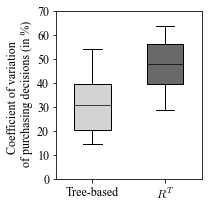

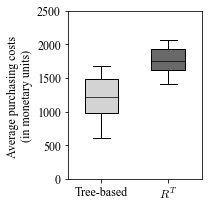

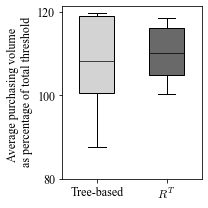

In [6]:
#get purchasing variance for different levels of sf, sr and ps
revenues = [1000/3.0, 1000]
purchasing_cov = {}
purchasing_cov_tap = {}
purchasing_costs = {}
purchasing_costs_tap = {}
purchasing_mean = {}
purchasing_mean_tap = {}

for sf in sf_levels:
    for sr in sr_levels:
        for ps in ps_levels:
            values = np.array([i for i in range(13)])
            weights = purchasing_weights[(sf, sr, ps)]
            weights_tap = purchasing_weights_tap[(sf, sr, ps)]

            # Calculate the weighted means
            purchasing_mean[(sf, sr, ps)] = weights @ values
            purchasing_mean_tap[(sf, sr, ps)] = weights_tap @ values

            # Calculate the weighted standard deviations
            purchasing_std = np.sqrt(np.sum(weights * (values - purchasing_mean[(sf, sr, ps)])**2) / np.sum(weights))
            purchasing_std_tap = np.sqrt(np.sum(weights_tap * (values - purchasing_mean_tap[(sf, sr, ps)])**2) / np.sum(weights_tap))

            # Calculate coefficient of variation
            purchasing_cov[(sf, sr, ps)] = purchasing_std / purchasing_mean[(sf, sr, ps)]
            purchasing_cov_tap[(sf, sr, ps)] = purchasing_std_tap / purchasing_mean_tap[(sf, sr, ps)]

            #calculate purchasing costs
            total_revenue = sum([revenues[i] * production[(sf, sr, ps)][i] * 4 for i in range(2)])
            holding_costs = 7.5 * sum(avg_inv_p[(sf, sr, ps)])
            purchasing_costs[(sf,sr,ps)] = -(avg_profits[(sf, sr, ps)] - total_revenue + holding_costs)
            purchasing_costs_tap[(sf,sr,ps)] = -(avg_profits_tap[(sf, sr, ps)] - total_revenue + holding_costs)

print(purchasing_mean)
    

#show boxplot of purchasing variance for tree-based and TAp
plt.figure(figsize=(3,3))
plt.rc('font', family="Times New Roman")
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rc('axes', labelsize=12)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
plt.rc('legend', fontsize=12)

box = plt.boxplot([list(purchasing_cov.values()),list(purchasing_cov_tap.values())],labels=["Tree-based","${R}^{T}$"],widths=0.5, showfliers=False, patch_artist=True, medianprops=dict(color='none'), meanprops=dict(color='black', linewidth=0.5))
# mean lines should be black
plt.setp(box['means'], color='black')
means = [np.mean(list(purchasing_cov.values())), np.mean(list(purchasing_cov_tap.values()))]
for i, mean in enumerate(means, start=1):
    plt.plot([i - 0.25, i + 0.25], [mean, mean], color="black", linewidth=0.7)  # Adjust line width and color as desired

colors = ['lightgrey', 'dimgrey']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)


plt.ylabel("Coefficient of variation \n of purchasing decisions (in %)")
plt.xticks([1,2],["Tree-based","${R}^{T}$"])
plt.yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7], ["0", "10", "20", "30", "40", "50", "60", "70"])

plt.tight_layout()
plt.savefig(f"{os.getcwd()}\Figures\purchasing_variance_boxplot_large.pdf")

#create boxplot of purchasing costs for tree-based and TAp
plt.figure(figsize=(3,3))
plt.rc('font', family="Times New Roman")
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rc('axes', labelsize=12)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
plt.rc('legend', fontsize=12)

box = plt.boxplot([list(purchasing_costs.values()),list(purchasing_costs_tap.values())],labels=["Tree-based","${R}^{T}$"],widths=0.5, showfliers=False, patch_artist=True, medianprops=dict(color='none'), meanprops=dict(color='black', linewidth=0.5))
# mean lines should be black
plt.setp(box['means'], color='black')
means = [np.mean(list(purchasing_costs.values())), np.mean(list(purchasing_costs_tap.values()))]
for i, mean in enumerate(means, start=1):
    plt.plot([i - 0.25, i + 0.25], [mean, mean], color="black", linewidth=0.7)  # Adjust line width and color as desired

colors = ['lightgrey', 'dimgrey']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)


plt.ylabel("Average purchasing costs \n(in monetary units)")
plt.xticks([1,2],["Tree-based","${R}^{T}$"])
plt.yticks([0, 500, 1000, 1500, 2000, 2500])

plt.tight_layout()
plt.savefig(f"{os.getcwd()}\Figures\purchasing_costs_boxplot_large.pdf")

#boxplot of mean purchasing volumes for tree-based and TAp
plt.figure(figsize=(3,3))
plt.rc('font', family="Times New Roman")
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rc('axes', labelsize=12)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
plt.rc('legend', fontsize=12)

purchasing_means_normalized = np.array(list(purchasing_mean.values()))/8
print(purchasing_means_normalized)
purchasing_means_normalized_tap = np.array(list(purchasing_mean_tap.values()))/8

box = plt.boxplot([purchasing_means_normalized,purchasing_means_normalized_tap],labels=["Tree-based","${R}^{T}$"],widths=0.5, showfliers=False, patch_artist=True, medianprops=dict(color='none'), meanprops=dict(color='black', linewidth=0.5))
# mean lines should be black
plt.setp(box['means'], color='black')
means = [np.mean(purchasing_means_normalized), np.mean(purchasing_means_normalized_tap)]
for i, mean in enumerate(means, start=1):
    plt.plot([i - 0.25, i + 0.25], [mean, mean], color="black", linewidth=0.7)  # Adjust line width and color as desired

colors = ['lightgrey', 'dimgrey']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)


plt.ylabel("Average purchasing volume \n as percentage of total threshold")
plt.xticks([1,2],["Tree-based","${R}^{T}$"])
plt.yticks([0.8, 1.0, 1.2], ["80", "100", "120"])

plt.tight_layout()
plt.savefig(f"{os.getcwd()}\Figures\purchasing_volume_boxplot_large.pdf")



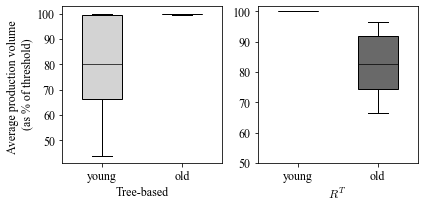

In [7]:
#show boxplots for average production levels for both products for tree-based and TAp
plt.figure(figsize=(6,3))

plt.rc('font', family="Times New Roman")
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rc('axes', labelsize=12)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
plt.rc('legend', fontsize=12)

avg_production = {i: np.array([production[(sf,sr,ps)][i] for sf in sf_levels for sr in sr_levels for ps in ps_levels]) for i in range(2)}
avg_production_tap = {i: np.array([production_tap[(sf,sr,ps)][i] for sf in sf_levels for sr in sr_levels for ps in ps_levels]) for i in range(2)}

#show tree-based boxplot in left subplot
plt.subplot(1,2,1)
box = plt.boxplot([avg_production[0], avg_production[1]],labels=["young","old"],widths=0.5, showfliers=False, patch_artist=True, medianprops=dict(color='none'), meanprops=dict(color='black', linewidth=0.5))
# mean lines should be black
plt.setp(box['means'], color='black')
means = [np.mean(avg_production[0]), np.mean(avg_production[1])]
for i, mean in enumerate(means, start=1):
    plt.plot([i - 0.25, i + 0.25], [mean, mean], color="black", linewidth=0.7)  # Adjust line width and color as desired
colors = ['lightgrey', 'lightgrey']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

plt.ylabel("Average production volume \n (as % of threshold)")
plt.xticks([1,2],["young","old"])
plt.xlabel("Tree-based")
plt.yticks([0.5, 0.6, 0.7, 0.8, 0.9, 1], ["50", "60", "70", "80", "90", "100"])

#show TAp boxplot in right subplot
plt.subplot(1,2,2)
box = plt.boxplot([avg_production_tap[0], avg_production_tap[1]],labels=["young","old"],widths=0.5, showfliers=False, patch_artist=True, medianprops=dict(color='none'), meanprops=dict(color='black', linewidth=0.5))
# mean lines should be black
plt.setp(box['means'], color='black')
means = [np.mean(avg_production_tap[0]), np.mean(avg_production_tap[1])]
for i, mean in enumerate(means, start=1):
    plt.plot([i - 0.25, i + 0.25], [mean, mean], color="black", linewidth=0.7)  # Adjust line width and color as desired

colors = ['dimgrey', 'dimgrey']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

plt.xticks([1,2],["young","old"])
plt.xlabel("${R}^{T}$")
plt.yticks([0.5, 0.6, 0.7, 0.8, 0.9, 1], ["50", "60", "70", "80", "90", "100"])

plt.tight_layout()
plt.savefig(f"{os.getcwd()}\Figures\production_boxplot_large.pdf")




{(3, 2, 15): 8.116628515882223, (3, 2, 20): 8.171495236243437, (3, 2, 25): 8.205497587511525, (3, 2, 30): 8.210006649353257, (3, 3, 15): 8.13155908488358, (3, 3, 20): 8.180911262406275, (3, 3, 25): 8.17061961323505, (3, 3, 30): 8.177021986333695, (3, 4, 15): 8.337172008671212, (3, 4, 20): 8.498422104812223, (3, 4, 25): 8.590998585325304, (3, 4, 30): 8.580130160667073, (3, 5, 15): 9.252599838955609, (3, 5, 20): 9.286259016337002, (3, 5, 25): 9.375397639369336, (3, 5, 30): 9.348124125979117, (5, 2, 15): 13.290886922812394, (5, 2, 20): 13.315135700026909, (5, 2, 25): 13.284922526444849, (5, 2, 30): 13.326177358938923, (5, 3, 15): 13.165098125967827, (5, 3, 20): 13.2228406837521, (5, 3, 25): 13.240097965762352, (5, 3, 30): 13.253971797210331, (5, 4, 15): 13.487074987562275, (5, 4, 20): 13.626176985251227, (5, 4, 25): 13.769876236917899, (5, 4, 30): 13.83391903642858, (5, 5, 15): 14.948276893877859, (5, 5, 20): 15.06610965524283, (5, 5, 25): 15.079496527630925, (5, 5, 30): 14.89053860760022

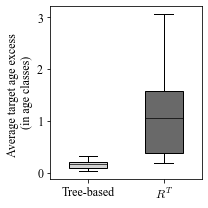

In [8]:
#show boxplot of average target age excess for tree-based and TAp
numAges = {3:15, 5:25}
targetAges = {3:[5,11], 5:[8,18]}
avg_issuance_age = {(sf,sr,ps): Issuance[(sf,sr,ps)]@np.array([i for i in range(1,numAges[sf]+1)])/np.sum(Issuance[(sf,sr,ps)]) for sf in sf_levels for sr in sr_levels for ps in ps_levels}
print(avg_issuance_age)
avg_target_age = {(sf,sr,ps): np.array([production[(sf,sr,ps)][i] for i in range(2)])@np.array(targetAges[sf])/np.sum([production[(sf,sr,ps)][i] for i in range(2)]) for sf in sf_levels for sr in sr_levels for ps in ps_levels}
print(avg_target_age)
avg_target_age_excess = {(sf,sr,ps): avg_issuance_age[(sf,sr,ps)] - avg_target_age[(sf,sr,ps)] for sf in sf_levels for sr in sr_levels for ps in ps_levels}

avg_issuance_age_tap = {(sf,sr,ps): Issuance[(sf,sr,ps)]@np.array([i for i in range(1,numAges[sf]+1)])/np.sum(Issuance[(sf,sr,ps)]) for sf in sf_levels for sr in sr_levels for ps in ps_levels}
avg_target_age_tap = {(sf,sr,ps): np.array([production_tap[(sf,sr,ps)][i] for i in range(2)])@np.array(targetAges[sf])/np.sum([production_tap[(sf,sr,ps)][i] for i in range(2)]) for sf in sf_levels for sr in sr_levels for ps in ps_levels}
avg_target_age_excess_tap = {(sf,sr,ps): avg_issuance_age_tap[(sf,sr,ps)] - avg_target_age_tap[(sf,sr,ps)] for sf in sf_levels for sr in sr_levels for ps in ps_levels}

plt.figure(figsize=(3,3))
plt.rc('font', family="Times New Roman")
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rc('axes', labelsize=12)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
plt.rc('legend', fontsize=12)

box = plt.boxplot([list(avg_target_age_excess.values()),list(avg_target_age_excess_tap.values())],labels=["Tree-based","${R}^{T}$"],widths=0.5, showfliers=False, patch_artist=True, medianprops=dict(color='none'), meanprops=dict(color='black', linewidth=0.5))
# mean lines should be black
plt.setp(box['means'], color='black')
means = [np.mean(list(avg_target_age_excess.values())), np.mean(list(avg_target_age_excess_tap.values()))]
for i, mean in enumerate(means, start=1):
    plt.plot([i - 0.25, i + 0.25], [mean, mean], color="black", linewidth=0.7)  # Adjust line width and color as desired

colors = ['lightgrey', 'dimgrey']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

plt.ylabel("Average target age excess \n (in age classes)")
plt.xticks([1,2],["Tree-based","${R}^{T}$"])
plt.yticks([0, 1, 2, 3], ["0", "1", "2", "3"])

plt.tight_layout()
plt.savefig(f"{os.getcwd()}\Figures\\target_age_excess_boxplot_large.pdf")




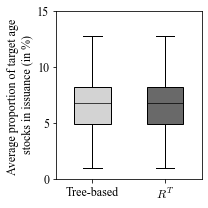

In [9]:
#show boxplot of average proportion of target age in issuance for tree-based and TAp
avg_target_age_proportion = {(sf,sr,ps): np.sum([Issuance[(sf,sr,ps)][t] for t in targetAges[sf]])/np.sum(Issuance[(sf,sr,ps)]) for sf in sf_levels for sr in sr_levels for ps in ps_levels}
avg_target_age_proportion_tap = {(sf,sr,ps): np.sum([Issuance[(sf,sr,ps)][t] for t in targetAges[sf]])/np.sum(Issuance[(sf,sr,ps)]) for sf in sf_levels for sr in sr_levels for ps in ps_levels}

plt.figure(figsize=(3,3))
plt.rc('font', family="Times New Roman")
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rc('axes', labelsize=12)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
plt.rc('legend', fontsize=12)

box = plt.boxplot([list(avg_target_age_proportion.values()),list(avg_target_age_proportion_tap.values())],labels=["Tree-based","${R}^{T}$"],widths=0.5, showfliers=False, patch_artist=True, medianprops=dict(color='none'), meanprops=dict(color='black', linewidth=0.5))
# mean lines should be black
plt.setp(box['means'], color='black')
means = [np.mean(list(avg_target_age_proportion.values())), np.mean(list(avg_target_age_proportion_tap.values()))]
for i, mean in enumerate(means, start=1):
    plt.plot([i - 0.25, i + 0.25], [mean, mean], color="black", linewidth=0.7)  # Adjust line width and color as desired

colors = ['lightgrey', 'dimgrey']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

plt.ylabel("Average proportion of target age \n stocks in issuance (in %)")
plt.xticks([1,2],["Tree-based","${R}^{T}$"])
plt.yticks([0.0, 0.05, 0.1, 0.15], ["0", "5", "10", "15"])

plt.tight_layout()
plt.savefig(f"{os.getcwd()}\Figures\\avg_target_age_proportion_boxplot_large.pdf")




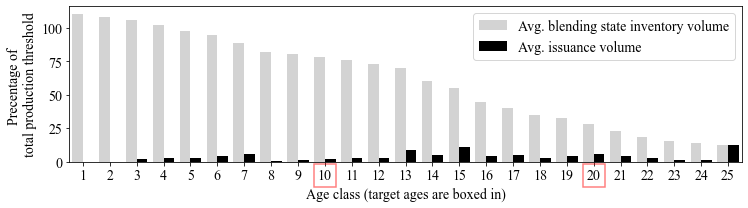

In [54]:
#Analyze the industry case
targetAges = [10,20]
#load the data
industry_path = f"{os.path.dirname(os.getcwd())}\\6Ages13Inventories\\Analysis\\PurchasingAmount\\2nP_4.166666666666667sF_PUpU_3sprRev_0.25oDP_20pS_largeInstance.xlsx"
#in the excel file, the titles are in the first column, the data starts in the second column
industry_data = openpyxl.load_workbook(industry_path).active
avg_profit_industry = industry_data["B1"].value
std_profit_industry = industry_data["B2"].value
blending_inv_industry = np.array([cell.value for row in industry_data['B17:Z17'] for cell in row])
issuance_industry = np.array([cell.value for row in industry_data['B19:Z19'] for cell in row])

#plot the blending inventory and issuance for the industry case
fig,ax = plt.subplots(1,1,figsize=(10.5,3))
plt.rc('font', family="Times New Roman")
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)
plt.rc('legend', fontsize=14)

ax.bar([i+1-0.2 for i in range(25)],blending_inv_industry/8, color='lightgrey', width=0.4)
ax.bar([i+1+0.2 for i in range(25)],issuance_industry/8, color='black', width=0.4)
ax.set_ylabel("Precentage of \ntotal production threshold")
ax.set_xlim(0.5,25.5)
ax.set_xticks([i for i in range(1,26)])
ax.set_yticks([0,0.25,0.5,0.75,1],[0,25,50,75,100])
ax.set_xlabel("Age class (target ages are boxed in)")	

for i in targetAges:
    ax.get_xticklabels()[i-1].set_bbox(dict(facecolor='none', alpha=0.5, edgecolor='red', linewidth=1.5))

#add legend
ax.legend(["Avg. blending state inventory volume","Avg. issuance volume"], loc='upper right')

plt.tight_layout()

plt.savefig(f"{os.getcwd()}\Figures\\industry_case_structure.pdf")





